# Evaluation

### Observations
1. The following dataset is composed of question answer pairs formed by humans using the dataset of PubMed articles involving the topic "Intelligence". In total, there are 40 questions and answers, covering 20 different types of questions for extensive evaluation. 
2. The prompt template used was: "Be as short as possible in your answer. As an AI assistant, answer the question accurately, precisely and concisely. Use the following context: 
    {context}
    Question: {question}"

3. No matter the question, due to the nature of using a vector based database, there is always a set of documents retrieved based on the query. As a result, the model tends to answer questions that are not related to the topic, ie PubMed here too. 
4. On extremely, precise queries like giving a list of authors of a specific paper from the PubMed dataset, the model takes a long time for retrieving the top k documents, and will throw an error in retrieving the documents. 
5. The model scores very well on BERTScore with a Precision average of 0.798, Recall average of 0.809 and an F1 average 0.803 for all the questions answered. 

### Handmade QA Dataset

In [3]:
import pandas as pd

df_human = pd.read_excel("Evaluation.xlsx", sheet_name="Human")

df_human.index += 1
df_human.head(40)

,Question Type,Question Type Detailed,Question,Answer Human,Answer Our Model,PMID,Source
1,factoid,Out of domain questions,How tall is the Golden Gate Bridge?,Should deny the question as it is out of domain,The Golden Gate Bridge is 1.7 miles long.,NaN,NaN
2,factoid,Out of domain questions,Where is the Eiffel Tower located?,Should deny the question as it is out of domain,Paris,NaN,NaN
3,factoid,In domain questions,What are the predictors of nurses' attitudes t...,Empathy and emotional intelligence are predict...,Nurses' attitudes toward communication are inf...,29495095.0,Aims and objectives: To analyse link between e...
4,factoid,In domain questions,What is Autism Spectrum Disorder (ASD) charact...,Autism spectrum disorders (ASD) are characteri...,"Social challenges, sensory issues, repetitive ...",26933939.0,Background: Autism spectrum disorders (ASD) ar...
5,factoid,Query contains named entities that should be t...,What is the TT100K dataset?,The Tsinghua-Tencent 100K (TT100K) traffic sig...,TT100K is a large-scale text classification da...,36502047.0,Traffic sign detection is an essential compone...
6,descriptive,Query contains named entities that should be t...,What is the full form of EHR? / Tell me about ...,Electronic health records (EHRs) are digital r...,'EHR stands for Electronic Health Record. It i...,32936099.0,Electronic health record (EHR) was hailed as a...
7,descriptive,Handle fully specified questions that might co...,Tell me about the recent neuroscience evidence...,The reviewed findings motivate new insights ab...,Recent neuroscience studies have shown that ge...,29167088.0,An enduring aim of research in the psychologic...
8,factoid,Handle fully specified questions that might co...,The best fit between brain traits and degrees ...,The best fit between brain traits and degrees ...,The best fit between brain traits and degrees ...,26598734.0,Many attempts have been made to correlate degr...
9,open-ended,Fully support both semantic search and lexicog...,(Semantic query) What is intelligence?,Intelligence is the ability to learn from expe...,Intelligence is a complex and multifaceted con...,22577301.0,Intelligence is the ability to learn from expe...
10,comparative,Fully support both semantic search and lexicog...,Lexicographical query) Which paper was publish...,Fluid intelligence is related to capacity in m...,"Title ""Fluid intelligence is related to capaci...",35751918.0,Theory of mind (ToM) is an essential ability f...


In [4]:
df_add = pd.read_excel("Evaluation.xlsx", sheet_name="Additional")

df_add.index += 1
df_add.head(60)

,Question Type,Question Type Detailed,Question,Source,Answer
1,yes/no,Confirmation Questions [yes or no],Do nursing students who perceive nursing as mo...,"""Purpose: This study was aimed at comparing th...","Yes, according to the study, nursing students ..."
2,multiple-choice,In domain questions,Which of the following factors is most strongl...,"""Purpose: This study was aimed at comparing th...",b) Willingness to choose the profession
3,yes/no,Confirmation Questions [yes or no],Do individuals with higher IQ show resilience ...,Neuroimaging evidences posit human intelligenc...,"Yes, individuals with higher IQ show resilienc..."
4,factoid,"Factoid-type Questions [what, which, when, who...",What areas of cognition does the PCTB assess i...,"For humans, there appears to be a clear link b...",The PCTB assesses areas of cognition including...
5,factoid,"Factoid-type Questions [what, which, when, who...","Who, besides chimpanzees, demonstrate a link b...","For humans, there appears to be a clear link b...","Besides chimpanzees, humans also demonstrate a..."
6,how,"Factoid-type Questions [what, which, when, who...",How does the Hybrid Delay Task (HDT) measure s...,"For humans, there appears to be a clear link b...",The Hybrid Delay Task (HDT) measures self-cont...
7,how,Causal Questions [why or how],How might exposure to lead-based industries sp...,Blood lead level and its impact on haemoglobin...,Exposure to lead-based industries can negative...
8,how,"Factoid-type Questions [what, which, when, who...",How do researchers use population decoding to ...,Faces are a behaviorally important class of vi...,Researchers use population decoding to charact...
9,how,"Factoid-type Questions [what, which, when, who...",How does a smart home system enable control of...,The continuous development of the society has ...,"The system enables control of lighting, air co..."
10,factoid,"Factoid-type Questions [what, which, when, who...",What were the primary goals of the Hungarian P...,Background: A Primary Care Model Programme was...,The primary goals of the Hungarian Primary Car...


### Combined QA Dataset of 60 Questions

The combined dataset of 60 questions is a result of hand crafting question answer pairs. The AI model is rarely used for assistance since the quality of question answer pairs are often poor.

In [5]:
df = pd.concat([df_human, df_add], axis=0)
df = df.drop(columns=["PMID", "Answer Our Model", "Question Type Detailed"])

df = df.fillna("")
df["Answer"] = df["Answer Human"].astype(str) + df["Answer"].astype(str)
df = df.drop(columns=["Answer Human"])
col = df.pop("Source")
df["Source"] = col
df.to_csv("Evaluation.csv", index=False)

df = df.reset_index(drop=True)
df.index += 1
df.head(60)

,Question Type,Question,Answer,Source
1,factoid,How tall is the Golden Gate Bridge?,Should deny the question as it is out of domain,
2,factoid,Where is the Eiffel Tower located?,Should deny the question as it is out of domain,
3,factoid,What are the predictors of nurses' attitudes t...,Empathy and emotional intelligence are predict...,Aims and objectives: To analyse link between e...
4,factoid,What is Autism Spectrum Disorder (ASD) charact...,Autism spectrum disorders (ASD) are characteri...,Background: Autism spectrum disorders (ASD) ar...
5,factoid,What is the TT100K dataset?,The Tsinghua-Tencent 100K (TT100K) traffic sig...,Traffic sign detection is an essential compone...
6,descriptive,What is the full form of EHR? / Tell me about ...,Electronic health records (EHRs) are digital r...,Electronic health record (EHR) was hailed as a...
7,descriptive,Tell me about the recent neuroscience evidence...,The reviewed findings motivate new insights ab...,An enduring aim of research in the psychologic...
8,factoid,The best fit between brain traits and degrees ...,The best fit between brain traits and degrees ...,Many attempts have been made to correlate degr...
9,open-ended,(Semantic query) What is intelligence?,Intelligence is the ability to learn from expe...,Intelligence is the ability to learn from expe...
10,comparative,Lexicographical query) Which paper was publish...,Fluid intelligence is related to capacity in m...,Theory of mind (ToM) is an essential ability f...


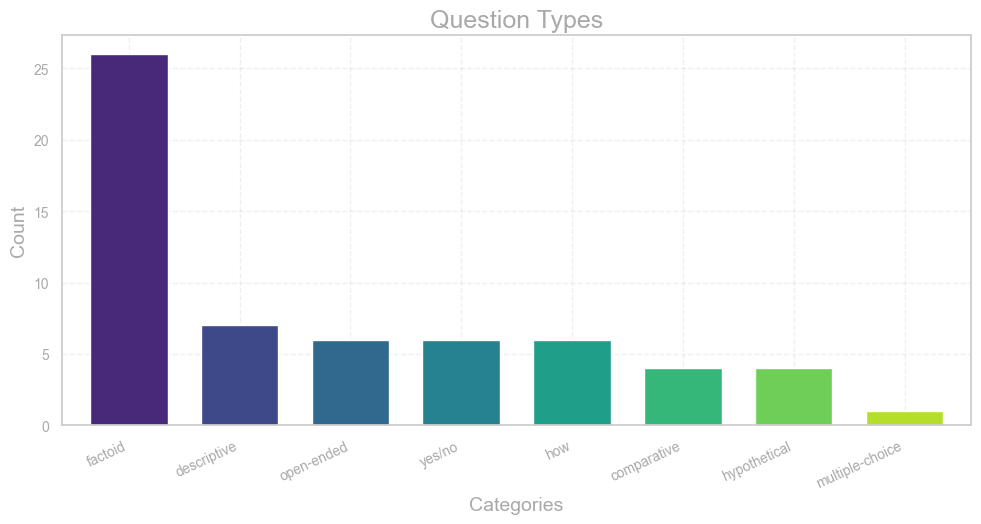

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", palette="viridis")
colors = sns.color_palette("viridis", 6)

num_categories = len(df["Question Type"].unique())
colors = sns.color_palette("viridis", num_categories)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

df["Question Type"].value_counts().plot(kind="bar", color=colors, ax=axes, width=0.7)
axes.set_title("Question Types", fontsize=18, color="darkgray")
axes.set_xlabel("", fontsize=14, color="darkgray")
plt.xlabel("Categories", fontsize=14, color="darkgray")
axes.set_ylabel("Count", fontsize=14, color="darkgray")
axes.tick_params(axis="both", labelsize=12, color="darkgray")
axes.grid(alpha=0.3, linestyle="--")

plt.tight_layout()
plt.xticks(rotation=25, ha="right", fontsize=10, color="darkgray")
plt.yticks(fontsize=10, color='darkgray')
plt.savefig("question_types.png", transparent=True)

plt.show()

In [6]:
df_kenneth = pd.read_excel("questions_kenneth.xlsx")
df_kenneth = df_kenneth.fillna("")
df_kenneth.drop(
    columns=[
        "combined_doc",
        "question_text",
        "part_prompt",
        "full_prompt",
        "generated_answer",
        "answer_generation_prompt",
        "notes",
    ],
    inplace=True,
)
df_kenneth = df_kenneth.rename(
    columns={
        "question_type": "Question Type",
        "generated_answer.1": "Answer",
        "abstract": "Source",
        "generated_question": "Question",
    }
)

col = df_kenneth.pop("Source")
df_kenneth["Source"] = col

df_kenneth.to_csv("Evaluation2.csv", index=False)

df_kenneth.index += 1
df_kenneth.head(53)

,Question Type,Question,Answer,Source
1,comparative,How do resting-state functional connectivity a...,Resting-state FC and activity flow mapping qua...,Cognitive functionality emerges due to neural ...
2,yes/no,Are spatial processing methods such as median ...,Yes,This paper presents a detection method for cha...
3,yes/no,Did the application of neural networks receive...,yes,The development of chemometrics aims to provid...
4,descriptive,Describe what post-perative cystography is oft...,Predicting postprostatectomy urinary incontine...,Purpose: Post-operative cystography has been u...
5,comparative,Are psychological changes that underly the the...,Under-researched.,Cannabis intoxication is commonly reported to ...
6,open-ended,What are possible influental factors that dist...,"Number of tumors, HCC stage, albumin, and tota...",Various factors are associated with the progno...
7,factoid,What should intervention programs for aggressi...,Increase cognitive empathy and explore emotion...,A strong relationship between empathy and aggr...
8,factoid,What components could be considered to underst...,Increase cognitive empathy and explore emotion...,The construction direction of Japanese teachin...
9,yes/no,Do young people with a tendency towards excite...,yes,Motivational characteristics such as excitemen...
10,how,How could electroencephalography helpful in tr...,"EEG helps classify stroke patients, aiding pos...",Electroencephalography (EEG) can access ischem...


### Evaluation using BLUE, ROGUE, BERTScore and BLEURT

In [8]:
import evaluate

bleu = evaluate.load("bleu")
rouge = evaluate.load("rouge")
bertscore = evaluate.load("bertscore")

#### BLEU: 0.045
#### - Precisions: 0.189, 0.052, 0.024, 0.017
#### - Brevity Penalty: 1.0 
#### - Length Ratio: 1.376, 
#### - Translation Length: 3129, 
#### - Reference Length: 2273

In [9]:
bleuscore = bleu.compute(predictions=data["answer_model"], references=data["answer_human"])
print(bleuscore)

{'bleu': 0.045048899310912036, 'precisions': [0.18951741770533717, 0.05208670333225494, 0.024222585924713585, 0.017224246439218285], 'brevity_penalty': 1.0, 'length_ratio': 1.3765948086229653, 'translation_length': 3129, 'reference_length': 2273}


#### ROUGE-1: 0.188
#### ROUGE-2: 0.062
#### ROUGE-L: 0.145
#### ROUGELSUM: 0.145

In [10]:
roguescore = rouge.compute(predictions=data["answer_model"], references=data["answer_human"])
print(roguescore)

{'rouge1': 0.18687004794367917, 'rouge2': 0.06134025828148944, 'rougeL': 0.14388020427364004, 'rougeLsum': 0.14580434653983615}


### BERTScore
#### - Precision Average: 0.797
#### - Recall Average : 0.808
#### - F1 Average: 0.802

In [ ]:
bertscore_res = bertscore.compute(
    predictions=data["answer_model"], references=data["answer_human"], lang="en"
)

In [12]:
precision_avg = sum(bertscore_res["precision"]) / len(bertscore_res["precision"])
recall_avg = sum(bertscore_res["recall"]) / len(bertscore_res["recall"])
f1_avg = sum(bertscore_res["f1"]) / len(bertscore_res["f1"])

print("Precision:", round(precision_avg, 3))
print("Recall:", round(recall_avg, 3))
print("F1:", round(f1_avg, 3))

Precision: 0.798
Recall: 0.809
F1: 0.803


### BLEURT Average: 0.411

In [13]:
from bleurt import score

checkpoint = "../../bleurt/BLEURT-20"
scorer = score.BleurtScorer(checkpoint)
bleurtscores = scorer.score(references=data["answer_human"], candidates=data["answer_model"])
print(bleurtscores)

[0.14580942690372467, 0.05647927522659302, 0.4219743609428406, 0.3292374014854431, 0.3317227363586426, 0.4920487403869629, 0.460013747215271, 0.5241051316261292, 0.6505316495895386, 0.5064743757247925, 0.6249086856842041, 0.7077160477638245, 0.46378612518310547, 0.5223029851913452, 0.5563317537307739, 0.5231899619102478, 0.44817692041397095, 0.455552339553833, 0.5159714221954346, 0.398914098739624, 0.5264562964439392, 0.4642863869667053, 0.028310075402259827, 0.3789845407009125, 0.14023269712924957, 0.17010577023029327, 0.47265058755874634, 0.352627158164978, 0.5054755806922913, 0.34551042318344116, 0.4582142233848572, 0.40998101234436035, 0.42548036575317383, 0.5384373068809509, 0.3802987337112427, 0.38959866762161255, 0.11709584295749664, 0.11709584295749664, 0.3916966915130615, 0.7051970362663269]


In [ ]:
import evaluate
from bleurt import score


def get_scores(predictions, references, checkpoint):
    """
    predictions: list of strings - model predictions
    references: list of strings - ground truth
    checkpoint: str - path to BLEURT checkpoint
    """

    bleu = evaluate.load("bleu")
    rouge = evaluate.load("rouge")
    bertscore = evaluate.load("bertscore")

    bleuscore = bleu.compute(predictions=predictions, references=references)
    roguescore = rouge.compute(predictions=predictions, references=references)
    bertscore_res = bertscore.compute(predictions=predictions, references=references, lang="en")

    checkpoint = checkpoint
    scorer = score.BleurtScorer(checkpoint)
    bleurtscores = scorer.score(references=references, candidates=predictions)

    return bleuscore, roguescore, bertscore_res, bleurtscores